**Updated 8/3/2022**
**Here we utilize twitter-XLM-roBERTa-base for Sentiment Analysis, base trained on ~198M tweets.**
With a new project direction, I will be developing a tool for bot builders/quants that will give them insights on trending topics in the crypto sphere. 
This tool will be in the form word clouds, displayed on the CA platform, based on different currencies that will update frequently.

In [18]:
# import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS

In [13]:
# import pretrained model
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [14]:
# example 
sentiment_task("You are awesome")

[{'label': 'Positive', 'score': 0.9297959804534912}]

In [15]:
# read previous Twitter data from Kaggle
import pandas as pd
test_csv = pd.read_csv(r'C:\Users\zhong\Downloads\Twitter Sentiment Analysis\twitter_validation.csv')
test_csv.columns = ["num", "group", "analysis", "sentiment"]
test_csv = test_csv.drop(columns=['num', 'group','analysis'])
list_csv = test_csv.values.tolist();
flat_list = []
for sublist in list_csv:
    for item in sublist:
        flat_list.append(item)
flat_list;

with open("flat_list.txt", "w", encoding = "utf-8") as output:
    output.write(str(flat_list))
output.close()

In [25]:
# create 2 sublists - positive and negative sentiments
pos_list = []
neg_list = []
for i in range(100):
    if sentiment_task(flat_list[i])[0]['label'] == 'Positive':
        pos_list.append(flat_list[i])
    else:
        neg_list.append(flat_list[i])


In [17]:
pos_list

['Thank you @EAMaddenNFL!! \n\nNew TE Austin Hooper in the ORANGE & BROWN!! \n\n#Browns | @AustinHooper18 \n\n pic.twitter.com/GRg4xzFKOn',
 'Congrats to the NVIDIA NeMo team for the 1.0.0 release candidate!\nReally excited to see NeMo embracing Hydra as the way to take control over the configuration madness that is machine learning! :)',
 'yeah and it’s fun',
 'happy birthday red dead redemption that shit changed my life what a crazy experience',
 'The new @CallofDuty for ps5 is 🔥🔥🔥🔥\nOh God 😭😍',
 "Call of duty warzone (livestream) w/ subs #Warzone youtu.be/7BhH_pjOMU4 via @YouTube Please come watch this AMAZING Call of Duty Warzone stream from this AMAZING streamer! It'd be really, really nice to give him some views and likes as well! 😀 #COD #CallofDuty #Warzone",
 'Finally played Rainbow Six Siege for the first time... I have to admit, I prefer it over pulling my hair out in CSGO any day.',
 '#gtc20 -  nice, motivational, and very accessible Nvidia/AI product fair + related tech tal

In [30]:
wc = WordCloud(background_color = 'white', 
               stopwords = stopwords, 
               height = 600, 
               width = 600)
wc.generate(str(pos_list))
wc.to_file('pos_wordcloud_output.png')

In [31]:
wc = WordCloud(background_color = 'white', 
               stopwords = stopwords, 
               height = 600, 
               width = 600)
wc.generate(str(neg_list))
wc.to_file('neg_wordcloud_output.png')

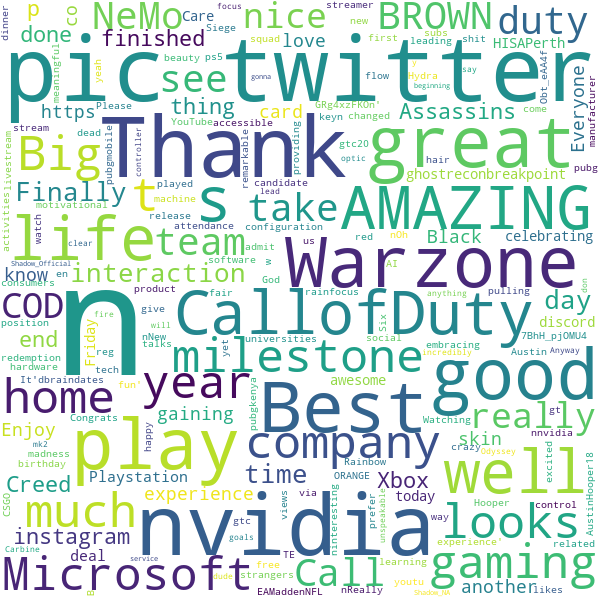

In [33]:
from IPython import display
display.Image(r"C:\Users\zhong\Downloads\Twitter Sentiment Analysis\pos_wordcloud_output.png")

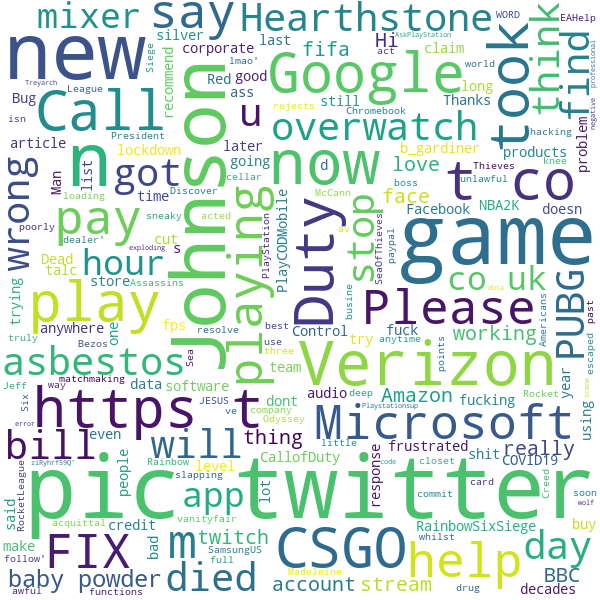

In [34]:
display.Image(r"C:\Users\zhong\Downloads\Twitter Sentiment Analysis\neg_wordcloud_output.png")